In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
#Dropping categrotical features like Channel and Region
df1=df.drop(['Channel','Region'],axis=1)

In [10]:
#Scaling the data before clustering
ms= MinMaxScaler()
x= ms.fit_transform(df1)
pd.DataFrame(df1).head()

,0,1,2,3,4,5
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


# K means clustering

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [12]:
ypred = kmeans.fit_predict(x)

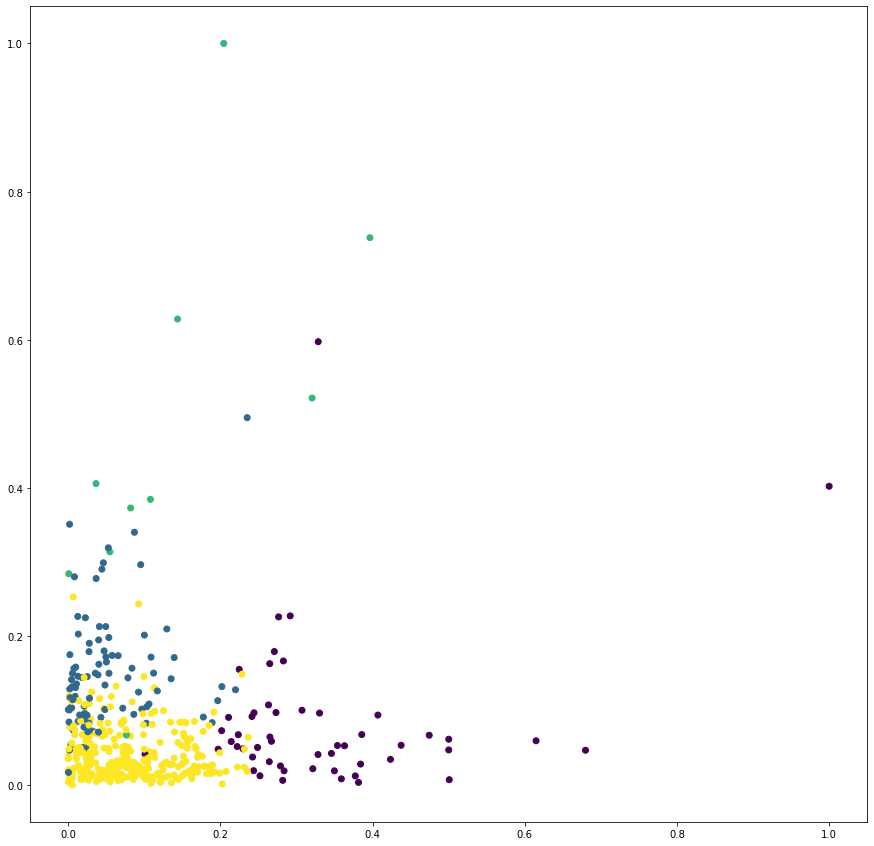

In [14]:
plt.scatter(x[:,0],x[:,1],c=ypred)
plt.gcf().set_size_inches((15,15))  

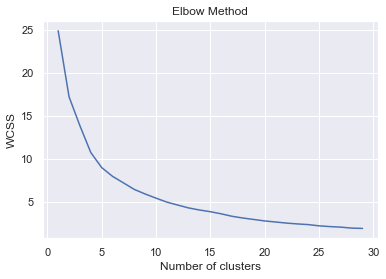

In [15]:
# Find best n_clusters with elbow method

wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
sns.set()    
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
df2=pd.DataFrame(kmeans.labels_)
pd.value_counts(df2.values.flatten())

15    90
23    55
3     46
9     34
18    32
0     31
5     29
14    19
20    17
21    16
11    15
1     15
17     6
25     6
10     5
27     4
2      4
16     4
24     2
13     1
12     1
19     1
8      1
7      1
6      1
22     1
4      1
26     1
28     1
dtype: int64

# Agglomerative clustering

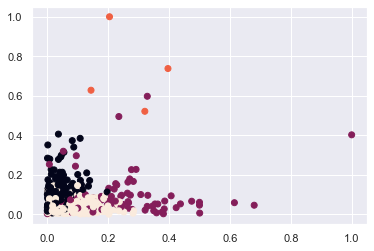

In [20]:
ac = AgglomerativeClustering(n_clusters = 4)
ac.fit(x)
ypred = ac.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=ypred)

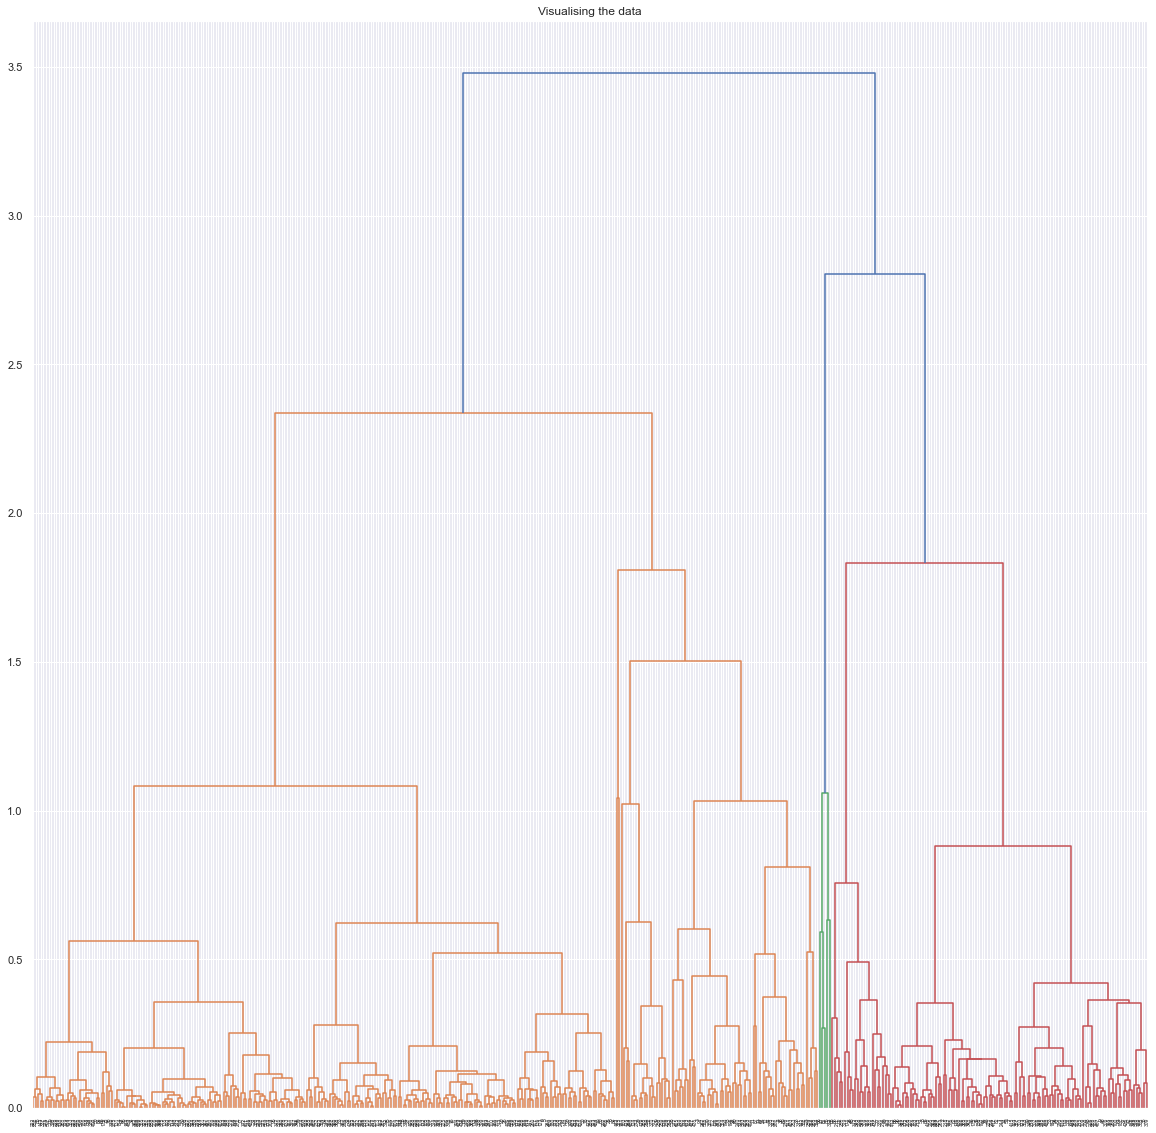

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(20,20))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x, method ='ward')))

In [22]:
# List for silhouette coefficients for each k
silhouette_coefficients = []

#Start at 2 clusters for silhouette coefficient
for i in range(2, 8):
    Agg = AgglomerativeClustering(n_clusters = i)
    Agg.fit(x)
    score = silhouette_score(x, Agg.labels_)
    silhouette_coefficients.append(score)

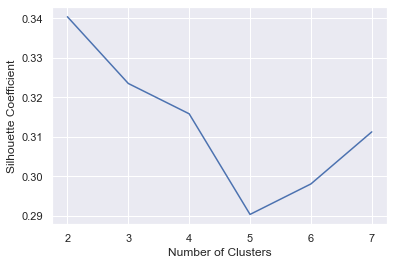

In [23]:
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [24]:
ac1=AgglomerativeClustering(n_clusters = 6)
ac1.fit(x)
ypred1=ac1.fit_predict(x)

In [25]:
ypred1

array([1, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 1, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       3, 4, 3, 2, 3, 4, 1, 3, 0, 3, 1, 3, 4, 3, 1, 3, 1, 2, 3, 3, 1, 4,
       3, 0, 1, 1, 0, 0, 1, 0, 3, 1, 1, 4, 1, 1, 1, 3, 3, 1, 1, 2, 2, 0,
       1, 0, 1, 0, 4, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 1, 3,
       1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 3, 1, 3, 3, 3, 1, 1, 4, 3, 3, 3, 1, 1, 1, 3, 4, 3, 3, 1, 3,
       0, 1, 1, 1, 1, 0, 3, 5, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 3,
       1, 1, 3, 4, 0, 1, 1, 3, 1, 3, 3, 4, 1, 4, 1, 3, 3, 3, 4, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 4, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 1, 3,
       3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,

In [26]:
df3=pd.DataFrame(ypred1)
pd.value_counts(df3.values.flatten())

1    230
3    101
0     78
4     24
2      5
5      2
dtype: int64

Agglomerative Clustering gives three Clustering, divided into three groups.